In [5]:
import numpy as np
from source_helper import *
import matplotlib.pyplot as plt
% matplotlib inline
from time import time
from lapl_well import LaplWell
from helper import Helper
from old_helper import OldHelper

In [208]:
xwd = 0.
ywd = 0.
zwd = 0.
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
s = 7
params = {"nseg": 10, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":10}
well = LaplWell(xwd, ywd, zwd, outer_bound, top_bound, bottom_bound, wtype, params)

In [209]:
def n_get_green_matrix(well, s):
    N = well.params["nseg"] # number of elements in half-length
    m = np.zeros((2+2*N, 2+2*N))
    dx = 1./N
    yd = well.ywd
    zd = well.zwd
    for i in range(-N, N+1):
        if i !=0:
            xd = well.xwd + i*dx
            m[i+N, 1] = 0.5* well.source.Green(s, xd, yd, zd, well.xwd, well.ywd, well.zwd,
                                               well.xwd - N*dx, well.xwd - N*dx+dx)
            m[i+N, -1] = 0.5* well.source.Green(s, xd, yd, zd, well.xwd, well.ywd, well.zwd,
                                                well.xwd + (N-1)*dx, well.xwd + N*dx)
            for j in range(-N+1, N):
                m[i+N, j+N+1] = 0.5*well.source.Green(s, xd, yd, zd, well.xwd, well.ywd, well.zwd,
                                                 dx*(j-1), dx*(j+1))
        else:
            m[i+N, :] = m[i+N+1,:] - m[i+N-1,:] # элемент правой части посередине будет равен -pi*2*dx/Fcd
    return m

In [218]:
N = well.params["nseg"]
dx = 1./N
i = -N
print(well.source.Green(s, well.xwd + i*dx, well.ywd, well.zwd, well.xwd, well.ywd, well.zwd,
                                               well.xwd - N*dx, well.xwd - N*dx+dx))
i = -N +1
print(well.source.Green(s, well.xwd + i*dx, well.ywd, well.zwd, well.xwd, well.ywd, well.zwd,
                                               well.xwd - N*dx, well.xwd - N*dx+dx))

0.246181999343
0.246181999343


In [210]:
def n_get_source_matrix(well, s):
    N = well.params["nseg"] # number of elements in half-length
    Fcd = well.params["Fcd"]
    m = np.zeros((2+2*N, 2+2*N))
    dx = 1./N
    coef = 0.25*(dx**2)*np.pi/Fcd
    m_ = np.zeros((N,N+1))
    for i in range(1, N+1):
        m_[i-1,0] = i
        for j in range(1, i+1):
            m_[i-1, j] = 2*(i-j) + 1
    m[:N, 1:N+2] = np.flip(np.flip(m_, 0), 1)
    m[N+1:1+2*N,N+1:] = m_
    m *= coef
    return m

In [211]:
def n_get_dummy_matrix(well, s):
    N = well.params["nseg"] # number of elements in half-length
    m = np.zeros((2+2*N, 2+2*N))
    m[:-1,0] = 1.
    m[N, 0] = 0.
    m[-1, 1] = 0.5
    m[-1, -1] = 0.5
    m[-1, 2:-1] = 1.
    return m

In [212]:
def n_get_right(well, s):
    N = well.params["nseg"]
    dx = 1./N
    Fcd = well.params["Fcd"]
    coef = np.pi * dx/Fcd/s
    b = np.zeros((2+2*N))
    b[-1] = 1/s/dx
    b[N] = -np.pi*2*dx/Fcd
    for i in range(N):
        b[N+i+1] = coef*(i+1)
        b[N-i-1] = coef*(i+1)
    return b

In [213]:
n_dummy_matrix = n_get_dummy_matrix(well,s)
n_green_matrix = n_get_green_matrix(well, s)
n_source_matrix = n_get_source_matrix(well, s)
n_right_part = n_get_right(well,s)
n_solution = np.linalg.solve(n_dummy_matrix - n_green_matrix + n_source_matrix, n_right_part)

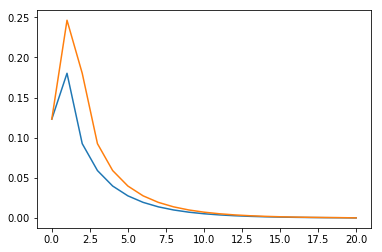

In [215]:
plt.plot(n_green_matrix[0][1:])
plt.plot(n_green_matrix[1][1:])

In [207]:
n_solution

array([  4.49218750e-02,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,

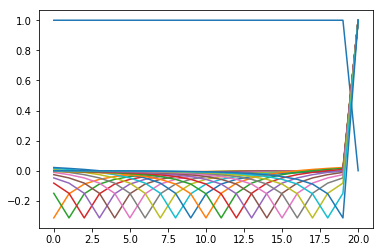

In [187]:
plt.plot(dummy_matrix - green_matrix + source_matrix)

In [188]:
helper = Helper()

In [189]:
dummy_matrix = helper.get_dummy_matrix(well)
green_matrix = helper.get_green_matrix(well, s)
source_matrix = helper.get_source_matrix(well, s)
right_part = helper.get_right_part(well,s)
solution = np.linalg.solve(dummy_matrix - green_matrix + source_matrix, right_part)

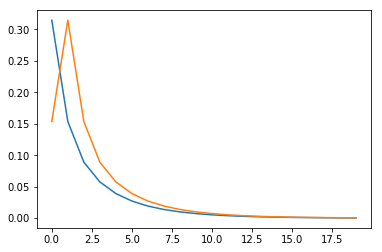

In [216]:
plt.plot(green_matrix[0][1:])
plt.plot(green_matrix[1][1:])

In [154]:
solution

array([ 0.09261609,  0.1046458 ,  0.0610211 ,  0.05937471,  0.05960156,
        0.06131367,  0.06381928,  0.0669878 ,  0.07098079,  0.07616059,
        0.09038041,  0.09038041,  0.07616059,  0.07098079,  0.0669878 ,
        0.06381928,  0.06131367,  0.05960156,  0.05937471,  0.0610211 ,
        0.1046458 ])

In [191]:
from old_helper import OldHelper
old_helper = OldHelper()

In [195]:
o_dummy_matrix = old_helper.get_dummy_matrix(well)
o_green_matrix = old_helper.get_green_matrix(well, s)
o_source_matrix = old_helper.get_source_matrix(well, s)
o_right_part = old_helper.get_right_part(well,s)
o_solution = np.linalg.solve(o_dummy_matrix - o_green_matrix + o_source_matrix, o_right_part)

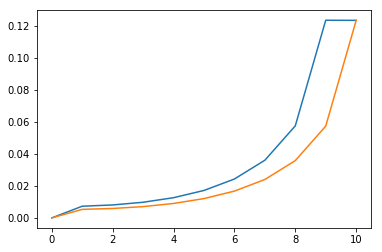

In [198]:
plt.plot(o_green_matrix[-3])
plt.plot(o_green_matrix[-2])

In [199]:
o_solution

array([ 0.08736038, -0.06047226,  0.49580085, -0.18844278,  0.44966659,
       -0.19326955,  0.42808639, -0.18737812,  0.41638321, -0.16840387,
        0.43660098])